In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score

In [2]:
df=pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
x=df.drop(["fetal_health"],axis=1) ## splitting x AND Y
y=df["fetal_health"]

In [8]:
x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [9]:
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

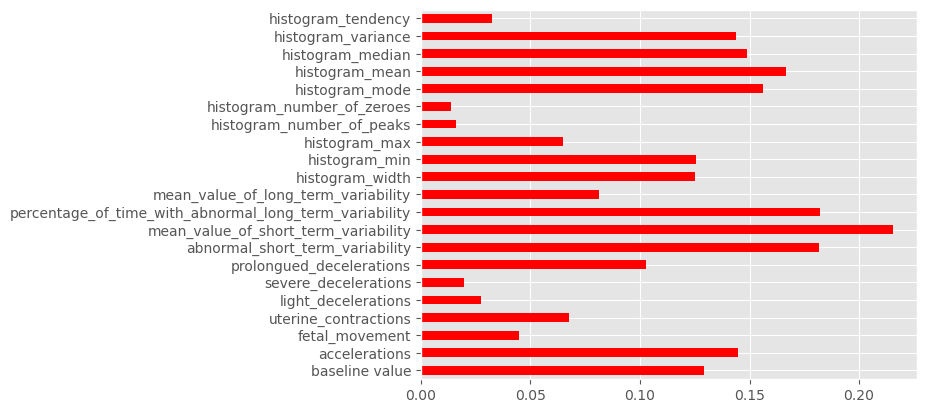

In [10]:
## the mutual importance between each features
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(x,y)
feature_impo=pd.Series(importance,x.columns[0:len(x.columns)])
feature_impo.plot(kind="barh",color="red")
plt.show()

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=1)

In [12]:
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
pred1=tree.predict(xtest)
pred1

array([1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 3., 1., 1., 2., 1.,
       1., 1., 3., 3., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 3., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 3., 2., 1.,
       1., 3., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       3., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 3., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 3., 1., 2., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 1.

In [14]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       326
         2.0       0.72      0.65      0.68        68
         3.0       0.85      0.91      0.88        32

    accuracy                           0.90       426
   macro avg       0.84      0.83      0.83       426
weighted avg       0.89      0.90      0.89       426



<Axes: >

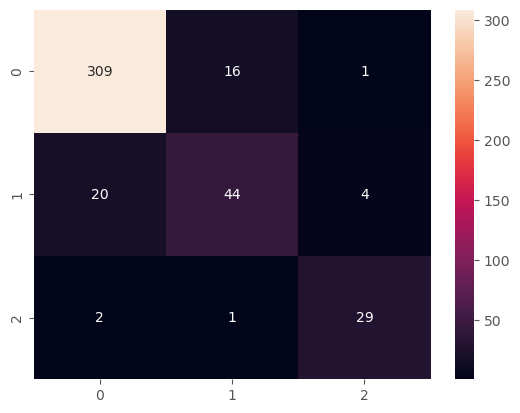

In [15]:
cm=confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [16]:
Forest=RandomForestClassifier()
Forest.fit(xtrain,ytrain)

RandomForestClassifier()

In [17]:
pred2=Forest.predict(xtest)
pred2

array([1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 3., 3., 1., 1., 1., 1., 3., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 3., 1., 2., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 1.

In [18]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       326
         2.0       0.88      0.66      0.76        68
         3.0       0.90      0.81      0.85        32

    accuracy                           0.93       426
   macro avg       0.91      0.82      0.86       426
weighted avg       0.93      0.93      0.92       426



<Axes: >

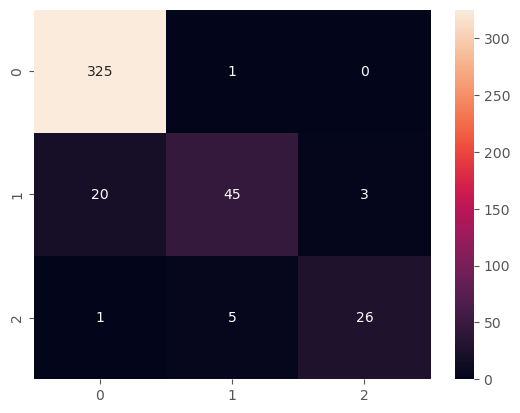

In [19]:
cm=confusion_matrix(ytest,pred2)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [20]:
logreg=LogisticRegression(solver="newton-cholesky")
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cholesky')

In [21]:
pred3=logreg.predict(xtest)
pred3


array([2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 2., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 3., 3., 1., 1., 1., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
       1., 1., 2., 1., 1.

In [22]:
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       326
         2.0       0.62      0.44      0.52        68
         3.0       0.78      0.66      0.71        32

    accuracy                           0.85       426
   macro avg       0.76      0.69      0.72       426
weighted avg       0.84      0.85      0.84       426



<Axes: >

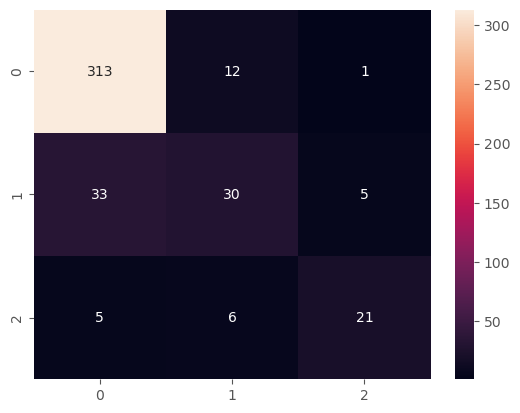

In [23]:
cm=confusion_matrix(ytest,pred3)
sns.heatmap(cm,annot=True,fmt="0.5g")